New question: Is there a significant linear relationship between these restaurants' reviews on google and their reviews on Yelp?

In order to answer this question, I will be performing an observational study. I believe that this is a retrospective study as it will take into account reviews.

Original dataset size: 75 restaurants
Found restaurant name column: 'Name'
Dataset size after removing Jinya Ramen: 74 restaurants
Rows after cleaning non-numeric values: 73
Number of restaurants analyzed: 73
Coefficient of Determination (R²): 0.3519
Pearson Correlation Coefficient: 0.9015
P-value: 0.0000


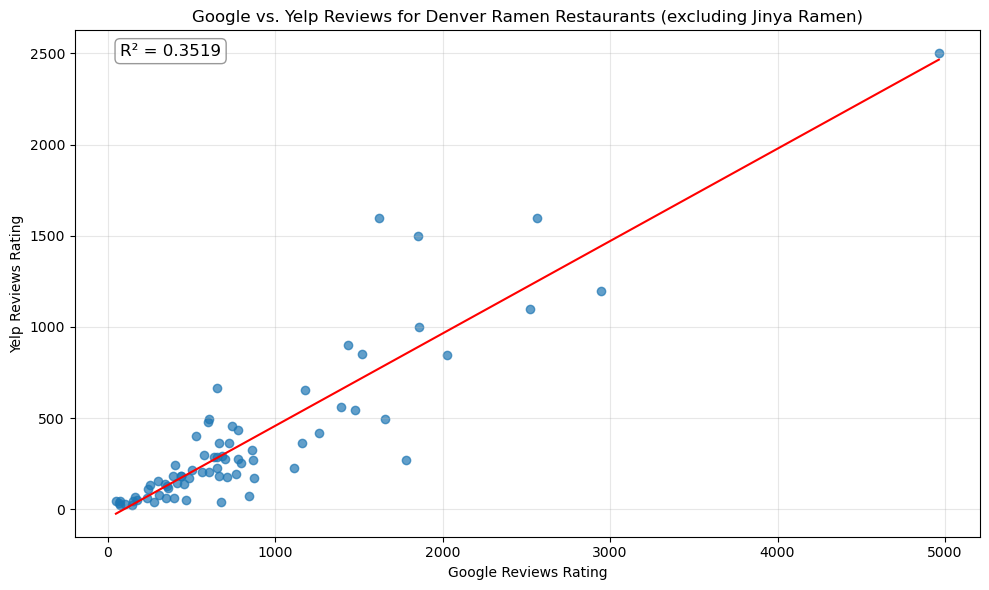

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

# Load the CSV file
try:
    df = pd.read_csv("Denver Ramen Restaurants - Sheet1.csv")
    
    # Check if the required columns exist
    if 'Google Reviews' not in df.columns or 'Yelp Reviews' not in df.columns:
        print("Column names in the dataset:", df.columns.tolist())
        print("Error: Required columns not found. Please check column names.")
    else:
        # Print original dataset size
        print(f"Original dataset size: {len(df)} restaurants")
        
        # Assuming there's a column with restaurant names - let's find it
        # Common column names for restaurant names
        possible_name_columns = ['name', 'restaurant', 'restaurant_name', 'restaurant name', 'Name', 'Restaurant']
        
        # Find the restaurant name column
        name_column = None
        for col in possible_name_columns:
            if col in df.columns:
                name_column = col
                break
        
        # If we couldn't find a name column, use the first column as a fallback
        if name_column is None:
            name_column = df.columns[0]
            print(f"Using '{name_column}' as the restaurant name column")
        else:
            print(f"Found restaurant name column: '{name_column}'")
        
        # Filter out Jinya Ramen
        df = df[~df[name_column].str.contains('Jinya Ramen', case=False, na=False)]
        print(f"Dataset size after removing Jinya Ramen: {len(df)} restaurants")
        
        # Convert review columns to numeric, coercing errors to NaN
        df['Google Reviews'] = pd.to_numeric(df['Google Reviews'], errors='coerce')
        df['Yelp Reviews'] = pd.to_numeric(df['Yelp Reviews'], errors='coerce')
        
        # Remove any rows with missing values in these columns
        df_clean = df.dropna(subset=['Google Reviews', 'Yelp Reviews'])
        
        # Print how many rows were kept vs. original
        print(f"Rows after cleaning non-numeric values: {len(df_clean)}")
        
        # Extract the columns
        google_reviews = df_clean['Google Reviews']
        yelp_reviews = df_clean['Yelp Reviews']
        
        # Calculate R² using sklearn
        r2 = r2_score(google_reviews, yelp_reviews)
        
        # Calculate Pearson correlation coefficient
        pearson_corr, p_value = stats.pearsonr(google_reviews, yelp_reviews)
        
        # Print results
        print(f"Number of restaurants analyzed: {len(df_clean)}")
        print(f"Coefficient of Determination (R²): {r2:.4f}")
        print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
        print(f"P-value: {p_value:.4f}")
        
        # Create a scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(google_reviews, yelp_reviews, alpha=0.7)
        plt.title('Google vs. Yelp Reviews for Denver Ramen Restaurants (excluding Jinya Ramen)')
        plt.xlabel('Google Reviews Rating')
        plt.ylabel('Yelp Reviews Rating')
        
        # Add regression line
        m, b = np.polyfit(google_reviews, yelp_reviews, 1)
        plt.plot(google_reviews, m*google_reviews + b, color='red')
        
        # Add R² text to plot
        plt.annotate(f"R² = {r2:.4f}", xy=(0.05, 0.95), xycoords='axes fraction', 
                    fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
        
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()  # This will print the full error traceback

Analysis: After removing the Jinya Ramen outlier, my coefficient of determination (R^2) is 0.3519, there is a relatively significant positive linear relationship between these restaurants google and yelp reviews. (There is white text above the scatter plot that is difficult to see, but shows some of the calculations made)